In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/thenghui/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
#train_X = np.asarray([1.1, 1.8, 3.2, 4.7, 5.9, 6.7, 7.5, 8.2])
#train_Y = np.asarray([1.2, 2.1, 3.1, 4.6, 5.5, 6.9, 7.8, 8.3])

#Prepare the data - generate randomly
train_X = np.random.rand(200)
noise = 0.1*np.random.randn(200) 
train_Y = train_X + noise



In [3]:
#Model: Y = X*W + b
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(-1., name="weight")
b = tf.Variable(-1., name="bias")

# linear model 
# activation = W*X + b
activation = tf.add(tf.multiply(W, X), b)


In [4]:
learning_rate = 0.01

#cost = loss
cost = tf.reduce_sum(tf.pow(activation - Y, 2))
#cost = tf.reduce_mean(tf.square(activation - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 15.701971054 W= 0.123161115 b= 0.45548862
Epoch: 0011 cost= 2.004942417 W= 0.94585997 b= 0.020726398
Epoch: 0021 cost= 1.975413680 W= 0.99214035 b= -0.0044754995
Epoch: 0031 cost= 1.976134777 W= 0.99476004 b= -0.0059020626
Epoch: 0041 cost= 1.976183176 W= 0.99490935 b= -0.0059832805
Epoch: 0051 cost= 1.976185799 W= 0.9949185 b= -0.0059882156
Epoch: 0061 cost= 1.976185799 W= 0.9949191 b= -0.0059885187
Epoch: 0071 cost= 1.976185799 W= 0.9949191 b= -0.0059885187
Epoch: 0081 cost= 1.976185799 W= 0.9949191 b= -0.0059885187
Epoch: 0091 cost= 1.976185799 W= 0.9949191 b= -0.0059885187
Optimization Finished!
cost= 1.9761858 W= 0.9949191 b= -0.0059885187


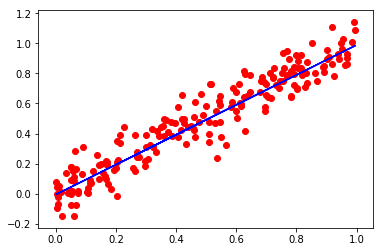

In [5]:

training_epochs = 100
display_step = 10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=",
                  "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y: train_Y})), "W=", sess.run(W), "b=",
                  sess.run(b))
    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    
    
    #Tensorboard
    writer = tf.summary.FileWriter('./graphs', sess.graph)

    plt.scatter(train_X, train_Y, color='red', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), color='blue', label='Fitted line')
    plt.show()
writer.close()
